In [22]:
from qite import QITE
from args import demo_args
from helper import state_to_ind, sigma_id, sigma_sx, sigma_sy, sigma_sz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
hamiltonian = np.kron(np.kron(sigma_id, sigma_sz), sigma_sy) # np.kron(np.kron(sigma_id, sigma_sz), np.kron(sigma_sz, sigma_id))
demo_args.num_qubits = 3
demo_args.db = 0.005 # 0.001
demo_args.num_steps = 100
demo_args.shots = 2**17
demo_args.delta = 0.1
qite = QITE(demo_args, hamiltonian)
qite.decompose_hamiltonian()

/Users/leonlufkin/Documents/GitHub/cognition_qite/qite.py:80: ComplexWarning: Casting complex values to real discards the imaginary part
  hamiltonian_decomp[label] = float(a_ij)


{'032': 1.0}

In [30]:
np.linalg.eig(hamiltonian)[0].min()

(-0.9999999999999999+0j)

In [31]:
ground_energy, ground_state = qite.run(use_qlist=True) 
# 8x8, 25: 0:34, 0:35 ==> 2:26, 1:23
# 16x16, 100: _, 18:00 ==> _, _

100%|██████████| 100/100 [34:15<00:00, 20.55s/it]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


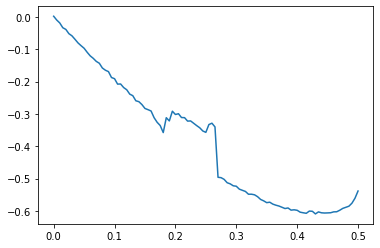

In [32]:
plt.plot(np.arange(demo_args.num_steps+1) * demo_args.db, ground_energy)

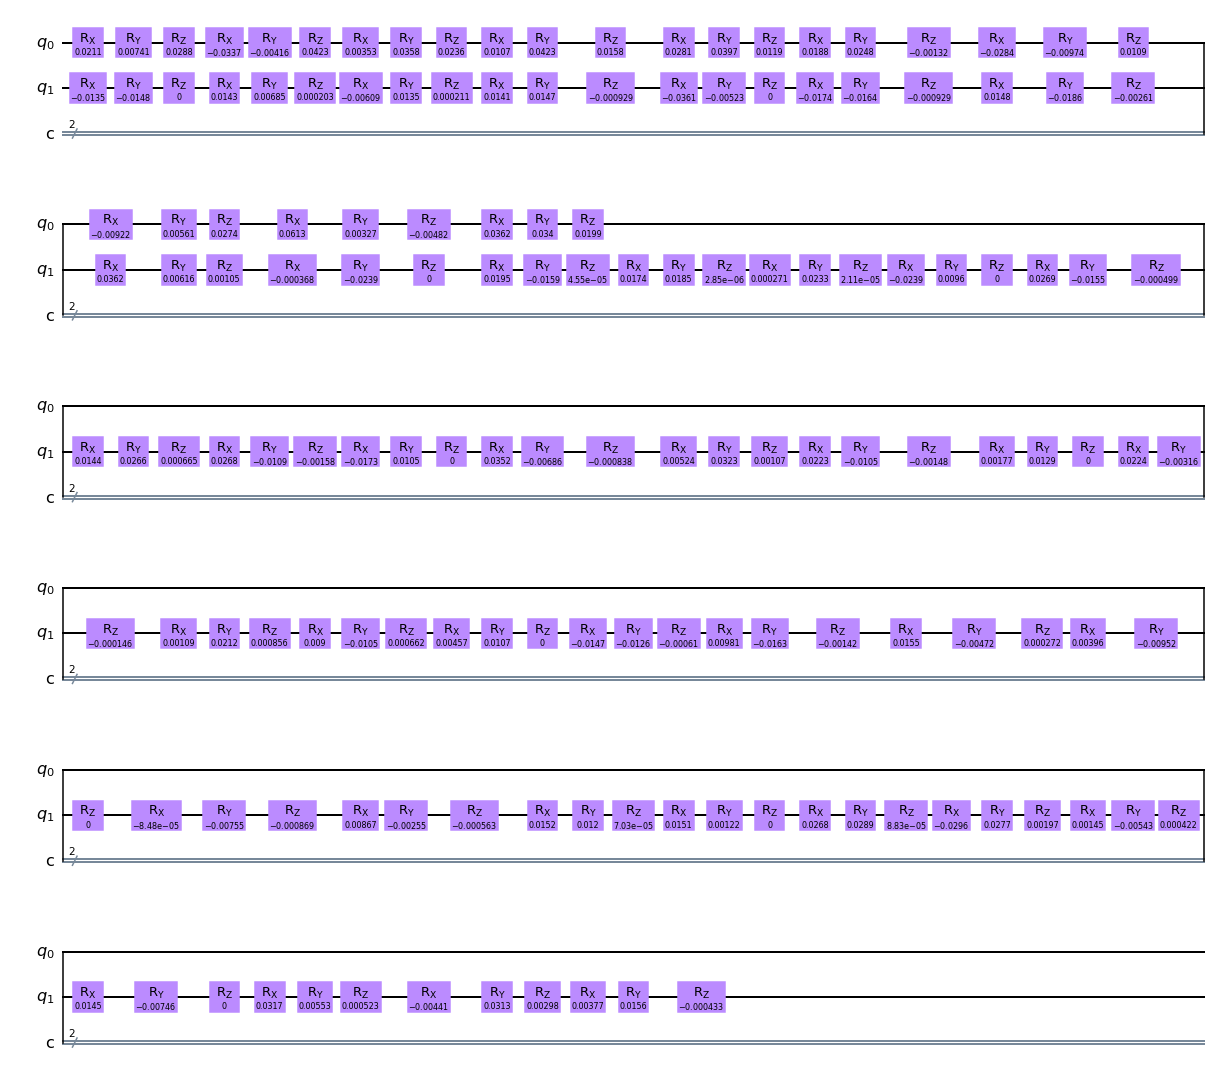

In [5]:
qc = qite.propagate()
qc.draw(output='mpl')

In [6]:
qite.alist[-1]

[2.2948975775455565e-16,
 0.014462174909279053,
 -0.007455473974675799,
 -2.4702462297909734e-16,
 -0.0015676210244091851,
 0.03174039569852499,
 0.00553059089071898,
 0.0005233144465855534,
 0.004148230546280798,
 -0.004411129561321444,
 0.031300849598215434,
 0.002978963682956268,
 0.0010150191022326048,
 0.0037655523986341965,
 0.01558434097253213,
 -0.00043336317415418465]

In [7]:
from helper import quarterize
quarterize(qite.alist[-1]).sum(-1)

NameError: name 'quarterize' is not defined

In [9]:
qite.qlist[-1]

[array([0.0070067 , 0.03622668, 0.03401691, 0.01993155]),
 array([ 2.29489758e-16,  1.44621749e-02, -7.45547397e-03, -2.47024623e-16,
        -1.56762102e-03,  3.17403957e-02,  5.53059089e-03,  5.23314447e-04,
         4.14823055e-03, -4.41112956e-03,  3.13008496e-02,  2.97896368e-03,
         1.01501910e-03,  3.76555240e-03,  1.55843410e-02, -4.33363174e-04])]

In [9]:
entry = qite.qlist[-1]
angles = entry[0]
angles

array([-2.42429682e-16,  4.55728564e-03,  9.23488016e-04, -4.77899599e-06,
        2.63016650e-05,  3.69840453e-03,  1.49404991e-03, -1.68528386e-16,
       -1.26616272e-02, -9.14656250e-04,  2.95333698e-03, -1.15542221e-02,
       -1.62611376e-04, -3.84425114e-03, -5.18749404e-04, -1.89138407e-03])

In [6]:
qite.propagate()

TypeError: 'numpy.float64' object is not iterable